# Project: Investigate a Dataset - [The Movie Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [2]:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [108]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [19]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [109]:
columns_to_drop=['id','imdb_id','homepage','overview','keywords','tagline']

In [110]:
df.drop(columns=columns_to_drop, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

In [150]:
df[df['revenue']==0]

,original_title,release_year,vote_average,popularity,ratio,budget,revenue,cast,second,third,director,runtime,genres,production_companies,release_date,vote_count,budget_adj,revenue_adj
48,Wild Card,2015,5.3,2.932340,0.0,30.000,0.0,Jason Statham,Michael Angarano,Milo Ventimiglia|Dominik GarcÃ­a-Lorido|Anne H...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,2.759999e+07,0.0
67,Survivor,2015,5.4,2.331636,0.0,20.000,0.0,Pierce Brosnan,Milla Jovovich,Dylan McDermott|Angela Bassett|Robert Forster,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,1.839999e+07,0.0
74,Mythica: The Darkspore,2015,5.1,2.165433,NaN,0.000,0.0,Melanie Stone,Kevin Sorbo,Adam Johnson|Jake Stormoen|Rocky Myers,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,0.000000e+00,0.0
75,Me and Earl and the Dying Girl,2015,7.7,2.141506,NaN,0.000,0.0,Thomas Mann,RJ Cyler,Olivia Cooke|Connie Britton|Nick Offerman,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,0.000000e+00,0.0
92,Mythica: The Necromancer,2015,5.4,1.876037,NaN,0.000,0.0,Melanie Stone,Adam Johnson,Kevin Sorbo|Nicola Posener|Jake Stormoen,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,The Endless Summer,1966,7.4,0.080598,NaN,0.000,0.0,Michael Hynson,Robert August,Lord 'Tally Ho' Blears|Bruce Brown|Chip Fitzwater,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,0.000000e+00,0.0
10862,Grand Prix,1966,5.7,0.065543,NaN,0.000,0.0,James Garner,Eva Marie Saint,Yves Montand|ToshirÅ Mifune|Brian Bedford,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,0.000000e+00,0.0
10863,Beregis Avtomobilya,1966,6.5,0.065141,NaN,0.000,0.0,Innokentiy Smoktunovskiy,Oleg Efremov,Georgi Zhzhyonov|Olga Aroseva|Lyubov Dobrzhans...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,0.000000e+00,0.0
10864,"What's Up, Tiger Lily?",1966,5.4,0.064317,NaN,0.000,0.0,Tatsuya Mihashi,Akiko Wakabayashi,Mie Hama|John Sebastian|Tadao Nakamaru,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,0.000000e+00,0.0


In [111]:
df[(df['cast'].isnull()) & (df['revenue']== 0)]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.000000,0.0
441,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.000000,0.0
465,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,BBC,1/24/15,19,7.8,2015,0.000000,0.0
536,0.122543,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,NaN,10/8/15,12,8.0,2015,0.000000,0.0
538,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,1/1/15,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,0.253376,0,0,Red's Dream,NaN,John Lasseter,4,Animation,Pixar Animation Studios,8/17/87,44,6.6,1987,0.000000,0.0
9755,0.046272,0,0,The Big Shave,NaN,Martin Scorsese,6,Drama,NaN,1/1/68,12,6.7,1968,0.000000,0.0
10434,0.146906,200,0,Six Men Getting Sick,NaN,David Lynch,4,Animation,Pensylvania Academy of Fine Arts,1/1/67,16,5.2,1967,1307.352748,0.0
10550,0.306425,0,0,Luxo Jr.,NaN,John Lasseter,2,Animation|Family,Pixar Animation Studios,8/17/86,81,7.3,1986,0.000000,0.0


# Most of the null values in the cast are of foreign or movies that are not relevant with a lot of missing values

In [112]:
df.dropna(subset= ['cast'] ,inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10790 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10790 non-null  float64
 1   budget                10790 non-null  int64  
 2   revenue               10790 non-null  int64  
 3   original_title        10790 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10752 non-null  object 
 6   runtime               10790 non-null  int64  
 7   genres                10768 non-null  object 
 8   production_companies  9800 non-null   object 
 9   release_date          10790 non-null  object 
 10  vote_count            10790 non-null  int64  
 11  vote_average          10790 non-null  float64
 12  release_year          10790 non-null  int64  
 13  budget_adj            10790 non-null  float64
 14  revenue_adj           10790 non-null  float64
dtypes: float64(4), int6

In [114]:
df.dropna(subset= ['director'] ,inplace=True)

In [115]:
df.duplicated().sum()

1

In [116]:
df.drop_duplicates(inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10751 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10751 non-null  float64
 1   budget                10751 non-null  int64  
 2   revenue               10751 non-null  int64  
 3   original_title        10751 non-null  object 
 4   cast                  10751 non-null  object 
 5   director              10751 non-null  object 
 6   runtime               10751 non-null  int64  
 7   genres                10731 non-null  object 
 8   production_companies  9779 non-null   object 
 9   release_date          10751 non-null  object 
 10  vote_count            10751 non-null  int64  
 11  vote_average          10751 non-null  float64
 12  release_year          10751 non-null  int64  
 13  budget_adj            10751 non-null  float64
 14  revenue_adj           10751 non-null  float64
dtypes: float64(4), int6

In [118]:
df['production_companies'].str.contains('unknown').sum()

0

In [119]:
df['production_companies'].fillna('unknown', inplace=True)
df['genres'].fillna('unkown',inplace=True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10751 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10751 non-null  float64
 1   budget                10751 non-null  int64  
 2   revenue               10751 non-null  int64  
 3   original_title        10751 non-null  object 
 4   cast                  10751 non-null  object 
 5   director              10751 non-null  object 
 6   runtime               10751 non-null  int64  
 7   genres                10751 non-null  object 
 8   production_companies  10751 non-null  object 
 9   release_date          10751 non-null  object 
 10  vote_count            10751 non-null  int64  
 11  vote_average          10751 non-null  float64
 12  release_year          10751 non-null  int64  
 13  budget_adj            10751 non-null  float64
 14  revenue_adj           10751 non-null  float64
dtypes: float64(4), int6

In [121]:
df[['cast','second','third']]=df['cast'].str.split('|',2, expand=True)

In [122]:
df['ratio']=df['revenue']/df['budget']

In [206]:
df=df[['original_title','release_year','vote_average','popularity','ratio', 'budget', 'revenue', 'cast', 'second', 'third', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'budget_adj',
       'revenue_adj']]

In [124]:
df['budget']=df['budget']/1000000
df['revenue']=df['revenue']/1000000

In [204]:
df_fin=df[(df['budget']>=.25) & (df['revenue']>= 0.2)]

In [207]:
df_fin.describe()

,release_year,vote_average,popularity,ratio,budget,revenue,runtime,vote_count,budget_adj,revenue_adj
count,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3.686000e+03,3.686000e+03
mean,2001.101736,6.183207,1.224938,4.349734,38.633774,112.347927,109.751763,547.551275,4.595974e+07,1.429425e+08
std,11.317652,0.785270,1.498473,10.176977,42.533815,179.043747,19.903552,894.351422,4.497648e+07,2.190417e+08
min,1960.000000,3.300000,0.001117,0.008383,0.250000,0.204940,26.000000,10.000000,2.423495e+05,1.919009e+05
25%,1995.000000,5.700000,0.479185,0.952871,11.000000,16.211537,96.000000,76.000000,1.473746e+07,2.190288e+07
50%,2004.000000,6.200000,0.834218,2.163631,25.000000,49.098016,106.000000,219.500000,3.155006e+07,6.643770e+07
75%,2010.000000,6.700000,1.412192,4.209231,50.000000,130.413254,120.000000,600.000000,6.243590e+07,1.707139e+08
max,2015.000000,8.400000,32.985763,250.000000,425.000000,2781.505847,338.000000,9767.000000,4.250000e+08,2.827124e+09


In [295]:
df_fin['release_date']=pd.to_datetime(df_fin['release_date'],format='%x')

<ipython-input-295-4e88a4b72bc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['release_date']=pd.to_datetime(df_fin['release_date'],format='%x')


In [296]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3686 entries, 0 to 10848
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   original_title        3686 non-null   object        
 1   release_year          3686 non-null   int64         
 2   vote_average          3686 non-null   float64       
 3   popularity            3686 non-null   float64       
 4   ratio                 3686 non-null   float64       
 5   budget                3686 non-null   float64       
 6   revenue               3686 non-null   float64       
 7   cast                  3686 non-null   object        
 8   second                3684 non-null   object        
 9   third                 3684 non-null   object        
 10  director              3686 non-null   object        
 11  runtime               3686 non-null   int64         
 12  genres                3686 non-null   object        
 13  production_compan


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 : Who are the top 10 actors/directors associated with highest average revenue?

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [335]:
hg_b_todf=df_fin['cast'].value_counts()
hg_b=pd.DataFrame(hg_b_todf)
hg_b.head(30)

,cast
Nicolas Cage,37
Bruce Willis,32
Johnny Depp,30
Tom Hanks,28
Robert De Niro,28
Denzel Washington,28
Sylvester Stallone,28
Tom Cruise,27
Arnold Schwarzenegger,25
Adam Sandler,24


In [287]:
hg_a_todf=df_fin.groupby(['cast'])['revenue'].sum().sort_values(ascending=False)
hg_a=pd.DataFrame(hg_a_todf)
hg_a.head(30)

,revenue
cast,
Tom Cruise,8016.895267
Daniel Radcliffe,7828.762983
Tom Hanks,7663.781590
Johnny Depp,6395.395751
Robert Downey Jr.,6344.250912
Harrison Ford,6079.564477
Ben Stiller,5274.432861
Will Smith,5112.691667
Bruce Willis,4986.782606


In [291]:
hg_d_todf=df_fin.groupby(['director'])['revenue'].sum().sort_values(ascending=False)
hg_d=pd.DataFrame(hg_d_todf)
hg_d.head(20)

,revenue
director,
Steven Spielberg,9018.563772
Peter Jackson,6523.244659
James Cameron,5841.894863
Michael Bay,4917.208171
Christopher Nolan,4167.548502
David Yates,4154.295625
Robert Zemeckis,3869.690869
Chris Columbus,3725.631503
Tim Burton,3665.414624


In [294]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3686 entries, 0 to 10848
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        3686 non-null   object 
 1   release_year          3686 non-null   int64  
 2   vote_average          3686 non-null   float64
 3   popularity            3686 non-null   float64
 4   ratio                 3686 non-null   float64
 5   budget                3686 non-null   float64
 6   revenue               3686 non-null   float64
 7   cast                  3686 non-null   object 
 8   second                3684 non-null   object 
 9   third                 3684 non-null   object 
 10  director              3686 non-null   object 
 11  runtime               3686 non-null   int64  
 12  genres                3686 non-null   object 
 13  production_companies  3686 non-null   object 
 14  release_date          3686 non-null   object 
 15  vote_count          

In [301]:
np.arange(1,12,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

### Research Question 2 : Do movies released in certain dates perform better than average? If yes, which dates?

In [265]:
import matplotlib.dates as mdates

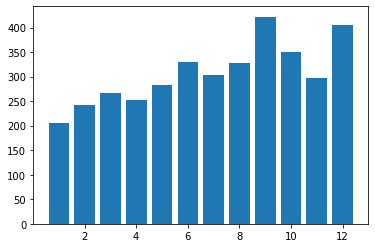

In [304]:
counts = df_fin['release_date'].dt.month.value_counts(sort=False)
plt.bar(counts.index,counts)

plt.show()

<AxesSubplot:xlabel='release_date'>

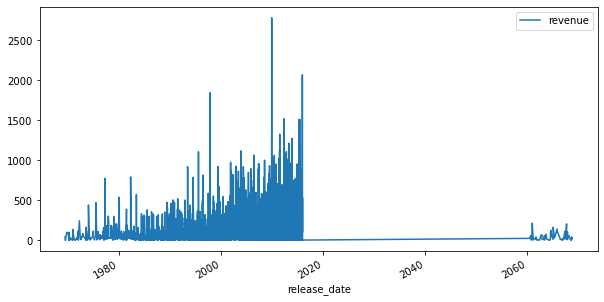

In [305]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_fin.plot(x='release_date', y='revenue', figsize=(10,5))


### Research Question 3 : Do movies with higher budgets tend to be rated higher or be more popular?

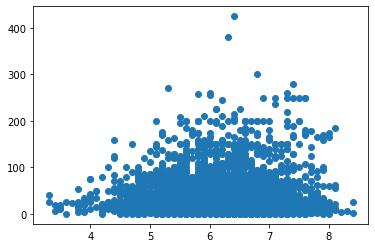

In [243]:
plt.scatter(x=df_fin['vote_average'], y=df_fin['budget']);

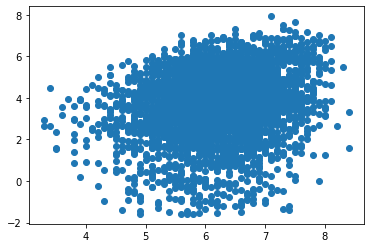

In [310]:
plt.scatter(x=df_fin['vote_average'], y=np.log(df_fin['revenue']), alpha=1)


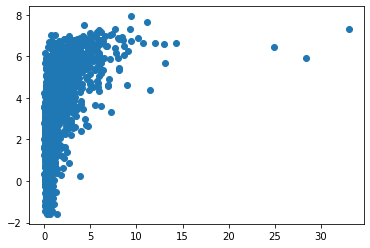

In [312]:
plt.scatter(x=df_fin['popularity'], y=np.log(df_fin['revenue']));

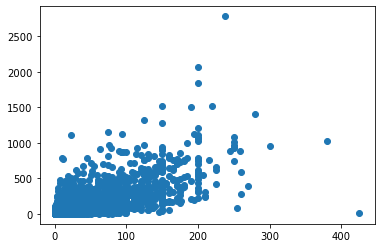

In [313]:
plt.scatter(x=df_fin['budget'], y=df_fin['revenue']);

In [316]:
df_fin[df_fin['revenue']> 2500]

,original_title,release_year,vote_average,popularity,ratio,budget,revenue,cast,second,third,director,runtime,genres,production_companies,release_date,vote_count,budget_adj,revenue_adj
1386,Avatar,2009,7.1,9.432768,11.736312,237.0,2781.505847,Sam Worthington,Zoe Saldana,Sigourney Weaver|Stephen Lang|Michelle Rodriguez,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,2.408869e+08,2.827124e+09


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.


> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

### Limitations
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])